In [1]:
# implement Quantum Circuit

In [2]:
from qiskit import*
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# define the oracle circuit
oracle = QuantumCircuit(2, name='oracle')  # using 2 qubits
oracle.cz(0,1)                             # controlled z gate flips sign of desired value
oracle.to_gate()                           # turn into gate
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [4]:
# implement Superposition

In [5]:
backend = Aer.get_backend('statevector_simulator')
grover_c = QuantumCircuit(2,2)                   # define circuit with 2 qubits and 2 registers
grover_c.h([0,1])                                # add Hadamard Gates on qubits
grover_c.append(oracle,[0,1])                    # add oracle
grover_c.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [6]:
job = execute(grover_c, backend)
result = job.result()

In [7]:
sv = result.get_statevector()
np.around(sv, 2)                # round numbers off

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [8]:
# implement Reflection Operator

In [9]:
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1]) # apply Hadamard Gates to qubits
reflection.z([0,1]) # apply z to qubits
reflection.cz(0,1)  # apply controlled z to qubits
reflection.h([0,1]) # turn qubits back into Hadamard Gates
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [10]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [11]:
backend = Aer.get_backend('qasm_simulator')
grover_c = QuantumCircuit(2,2)     # 2 qubits, 2 possible registers
grover_c.h([0,1])                  # Hadamards on both qubits to prepare for superposition
grover_c.append(oracle, [0,1])     # add oracle
grover_c.append(reflection, [0,1]) # add reflection
grover_c.measure([0,1], [0,1])     # add measurements

In [12]:
grover_c.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

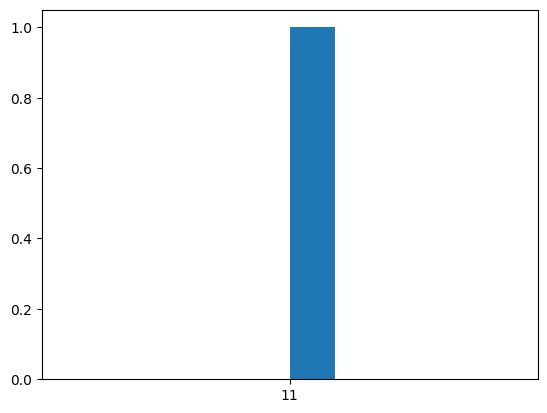

In [13]:
result = execute(grover_c, backend, shots=1).result() # get the 11 state
plt.hist(result.get_counts(grover_c))                 # plot as histogram